## Errores Numéricos con Monte Carlo

In [ ]:
from pylab import *
from numpy import *

Recordemos la definición de Varianza:
Varianza (que suele representarse como $\sigma ^{2}$) de una variable aleatoria es una medida de dispersión definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media.

Determinando la Varianza de nuestra estimación:
    
$$\sigma ^2=\langle f^2 \rangle - \langle f \rangle ^2$$

La varianza nos da la idea de cuanto varia f(x) en el dominio de x.

## Varianza para Monte Carlo Crudo

   
$$\sigma ^2=\langle f^2 \rangle - \langle f \rangle ^2$$

Supongamos que hacemos la medición de $I$ con distintas $N$ ($I_N$). De acuerdo al teorema del límite central, estos valores están distribuidos alrededor de $\langle I \rangle$ con una distribución normal. Entonces, la varianza la podemos definir como:

$$\sigma_m ^2=\langle I^2 \rangle - \langle I \rangle ^2$$

donde $\sigma_m$ es la desviación estandar del promedio:
$$\sigma_m =\frac{\sigma}{\sqrt{N}}$$

 Para Monte Carlo crudo

$$
\sigma^2=\left[\frac{b-a}{N}\sum_i^N f^2(x_i)\right]-\left[\sum_j^N \frac{b-a}{N}f(x_i)\right]^2
$$


Regresemos a la integral de $$\int_0^{\infty}\frac{e^{-x}}{1+(x-1)^2}dx$$

In [ ]:
from random import *
from pylab import *
from math import *

def f(x):
    """
    x tiene que estar en radianes
    """
    return (e**(-1*x))/(1+(x-1)**2)

def pot_f(x):
    return (f(x)*f(x))

def varianza_deMC(f,a,b,N=5000):
    n_in = 0
    #<I**2>
    for i in range(N):
        x = uniform(a, b)
        n_in += f(x)**2
    sum_of_sqs = n_in*(b-a) / N
    #<I>**2
    n_in = 0
    for i in range(N):
        x = uniform(a, b)
        n_in = f(x)
    sq_ave = ((b-a)*n_in/N)**2

    return sum_of_sqs - sq_ave

print('varianza',varianza_deMC(f,0,5,10000))
error=sqrt(varianza_deMC(f,0,5,10000))/sqrt(10000)
print('con un error estimado de =',error)

varianza 0.26986634057594916
con un error estimado de = 0.005158853744819537


¿Conviene estimar el error con el error porcentual o con el error estimado por la varianza?
Regresemos al problema de calcular $\pi$ dado que conocemos el valor real.

100.0 3.197567991958743 0.055975338368949856
200.0 3.21588332875134 0.07429067516154708
400.0 3.1529591991495574 0.01136654555976424
800.0 3.1591790502947203 0.017586396704927232
1600.0 3.1553389213091756 0.013746267719382477
3200.0 3.152820739090896 0.011228085501103102
6400.0 3.149888779103133 0.008296125513339803
12800.0 3.1406457990147945 0.0009468545749986568
25600.0 3.1408692837807948 0.000723369808998342
51200.0 3.138885454094232 0.0027071994955609746
102400.0 3.140077675158896 0.001514978430896985
204800.0 3.140434387181569 0.00115826640822414
409600.0 3.142093420256178 0.0005007666663847665
819200.0 3.1420247937391244 0.00043214014933123934
1638400.0 3.1410332659222893 0.0005593876675038523
3276800.0 3.1418361375165667 0.00024348392677353559


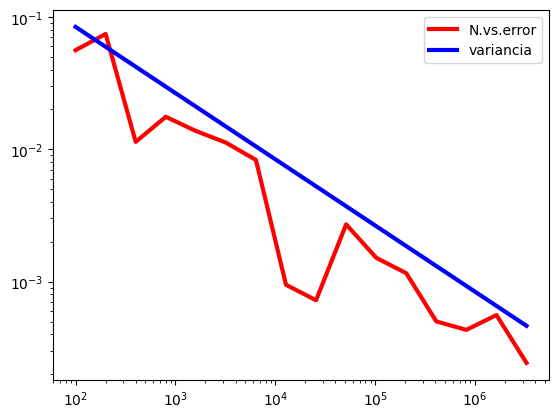

In [ ]:
from random import random
from pylab import *
#Funcion que guarda todos los puntos aleatorios de un solo experimento.
def random_vectoria(n):
    r=[]
    for i in range(n):
        r.append(random())
    return r
total=16 #Veces que se repite el experimento
N=zeros(total)
R=zeros(total) #Resultado de la integral
E=zeros(total)
n0=100 #numeros de tiros o puntos de la integral (iniciamos con 100)
for i in range(total): #i guarda el numero de veces que repito el experimento
    N[i]=n0
    r=random_vectoria(n0)
    R[i]=0.
    for j in range(n0): #aquí va MonteCarlo
        x=r[j]
        R[i]+=sqrt(1-x**2) #circulo unitario
    R[i]*=4./float(n0)
    n0*=2 #duplicamos el numero de tiros
    E[i] = abs(R[i]-pi) #Error absoluto
    print(N[i],R[i],E[i])

plot(N,E,ls='-',c='red',lw=3,label='N.vs.error')
plot(N,0.84/sqrt(N),ls='-',c='blue',lw=3,label='variancia')
xscale('log')
yscale('log')
legend()
show()

Hasta el momento, tenemos dos formas de mejorar la integral:
    1. Con muchos pasos
    2. Reduciendo la varianza (Importance sampling)

Una manera de reducir la variancia es muestrear las regiones donde se encuentra la integral, con mayores contribuciones de puntos (ya no tener una distribución uniforme de puntos aleatorios). Para esto, introducimos una distribución de probabilidad $g(x)$ normalizada en el intervalo de integración
$$\int _a^b{g(x)dx} = 1.$$
Entonces, se puede reescribir la integral de $f(x)$ como
$$I=\int _a^b{\frac{f(x)}{g(x)}g(x)dx}$$
Podemos evaluar esta integral, mapeando el espacio con puntos aleatorios que obedecen la distribución de probabilidad dada $g(x)$ y evaluando la suma $$I(N)=\frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{g(x_i)}$$.

(Para el caso uniforme $g(x)=1/(b-a)$, la expresión se reduce a Monte Carlo crudo)

Truco: Para escoger $g(x)$, que minimice la variancia, podemos escoger una $g(x)$ que imite a $f(x)$, donde $f(x)$ es larga. Si se escoge apropiadamente $g(x)$, el integrando varia muy lentamente, y la variancia se reduce.

### Visualicemos un problema concreto

Para la integral de $$I(x)=\int_0^{\infty}\frac{e^{-x}}{1+(x-1)^2}dx$$

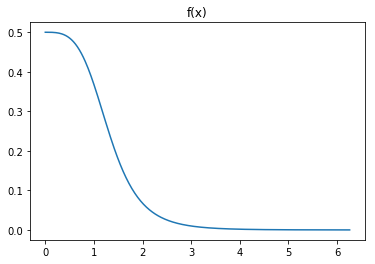

In [ ]:
def f(x):
    """
    x tiene que estar en radianes
    """
    return (e**(-1*x))/(1+(x-1)**2)
xs = [float(i/50) for i in range(int(50*pi*2))]
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)");

Proponemos la primera función de peso:
$$g=Ae^{-\lambda x}$$

Entonces, g(x) la escogimos así porque es la función que más se parece a la función a evaluar. Ahora, queda por determinar la $A$ y $\lambda$ optima que nos resuelva la función


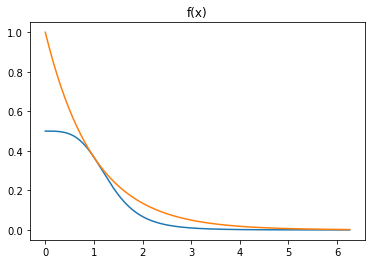

In [ ]:
def f(x):
    """
    x tiene que estar en radianes
    """
    return (e**(-1*x))/(1+(x-1)**2)

def f1(x):
    return 1*(e**(-1*x))
xs = [float(i/50) for i in range(int(50*pi*2))]
ys = [f(x) for x in xs]
ys1 = [f1(x) for x in xs]
plt.plot(xs,ys)
plt.plot(xs,ys1)
plt.title("f(x)");

La azúl es la función a aproximar, mientras que la naranja es nuestra función de peso. Nótese que para que la función de prueba se aproxime mejor es necesario tener $A$ y $\lambda$ óptimas.

Para encontrar el caso óptimo y resolver la integral, cálculemos distintas $\lambda \in [0.05,3.0]$ y determinaremos la variancia que se genera. Luego, escogeremos la que tiene variancia mínima. La variancia será cálculada como:

$$
\sigma^2=\left[\frac{1}{N} \sum_i^N \frac{f^2(x_i)}{g^2(x_i)} \right] - \left[\frac{1}{N} \sum_i^N \frac{f^2(x_j)}{g^2(x_j)} \right]^2
$$

y aproximaremos la integral como:

$$
I\approx \frac{1}{N} \sum_i^N \frac{f(g^{-1}(r_i))}{g(g^{-1}(r_i))}
$$


In [ ]:
def f(x):
    """
    x tiene que estar en radianes
    """
    return (e**(-1*x))/(1+(x-1)**2)

def P(x, A, lamda):
    e = 2.71828
    return A*pow(e, -1*lamda*x)

def P_1(r, lamda):
    return (-1 * log(float(r)))/lamda


def varianza_min(lamda, N):
    A = lamda
    int_max = 5
    total = 0
    for i in range(N):
        x = uniform(0, int_max)
        total += (f(x)/P(x, A, lamda))**2
    sum_of_sqs = total / N

    total = 0
    for i in range(N):
        x = uniform(0, int_max)
        total += f(x)/P(x, A, lamda)
    sq_ave = (total/N)**2
    return sum_of_sqs - sq_ave

def importance_sampling_MC(lamda, N):
    A = lamda
    total = 0
    for i in range(N):
        r = uniform(0,1)
        total += f(P_1(r, lamda))/P(P_1(r, lamda), A, lamda)
    approximation = float(total/N)
    return approximation

test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas): #funcion que va enumerando una lista mientras la recorre
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(varianza_min(lamda, 10000))

optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))] #aqui encuentro el menor elemento de todas las varianza

print(f"Lambda Optimal: {optimal_lamda}")
print(f" VarianciaOptimal: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

N = 10000
approx = importance_sampling_MC(optimal_lamda,N)
variance = varianza_min(optimal_lamda, N)
error = (variance/N)**0.5

print('Calculando la integral con la lambda mejor')
print(f"Integral con Importance Sampling: {approx}")
print(f"Variancia: {variance}")
print(f"Error: {error}")

lambda 1/60: 0.05
lambda 2/60: 0.1
lambda 3/60: 0.15000000000000002
lambda 4/60: 0.2
lambda 5/60: 0.25
lambda 6/60: 0.30000000000000004
lambda 7/60: 0.35000000000000003
lambda 8/60: 0.4
lambda 9/60: 0.45
lambda 10/60: 0.5
lambda 11/60: 0.55
lambda 12/60: 0.6000000000000001
lambda 13/60: 0.65
lambda 14/60: 0.7000000000000001
lambda 15/60: 0.75
lambda 16/60: 0.8
lambda 17/60: 0.8500000000000001
lambda 18/60: 0.9
lambda 19/60: 0.9500000000000001
lambda 20/60: 1.0
lambda 21/60: 1.05
lambda 22/60: 1.1
lambda 23/60: 1.1500000000000001
lambda 24/60: 1.2000000000000002
lambda 25/60: 1.25
lambda 26/60: 1.3
lambda 27/60: 1.35
lambda 28/60: 1.4000000000000001
lambda 29/60: 1.4500000000000002
lambda 30/60: 1.5
lambda 31/60: 1.55
lambda 32/60: 1.6
lambda 33/60: 1.6500000000000001
lambda 34/60: 1.7000000000000002
lambda 35/60: 1.75
lambda 36/60: 1.8
lambda 37/60: 1.85
lambda 38/60: 1.9000000000000001
lambda 39/60: 1.9500000000000002
lambda 40/60: 2.0
lambda 41/60: 2.0500000000000003
lambda 42/60: 2.

Ejemplo:
Sea $$I=\int _0^1 {e^{-x^2}dx}.$$
Una función de peso razonable es $g(x)=Ae^{-x}$, donde $A$ es la constante de normalización.